Aufgabenteil 1 Bild einlesen

Starten Sie die IDE und legen Sie ein neues Projekt auf dem Z-Laufwerk an.
 2. Lesen Sie ein Bild mit Hilfe von scikit-image ein und lassen Sie sich das Bild anzeigen.
 3. Untersuchen Sie den Datentyp des eingelesenen Bildes. Wie ist ein Numpy Array aufge
baut?
 4. Lassen Sie sich die drei Farbkanale eines Bildes getrennt anzeigen.
 5. Implementieren Sie eine Funktion, die ein eingelesenes Bild wahlweise horizontal oder
 vertikal spiegelt. (Verwenden Sie hierfur keine Numpy Funktionen.)

https://scikit-image.org/docs/stable/user_guide/data_types.html

Shape of bild01: (333, 500, 3)
Data type of bild01: uint8


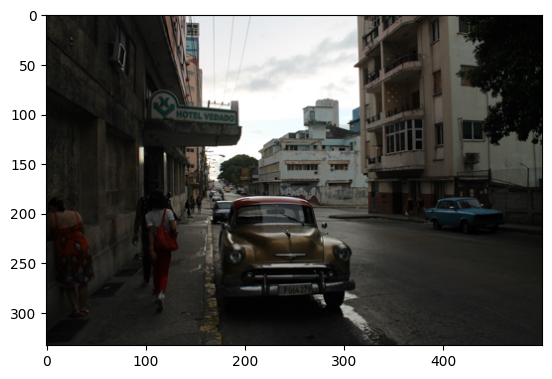

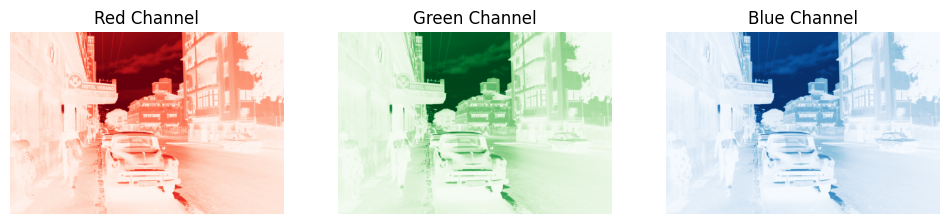

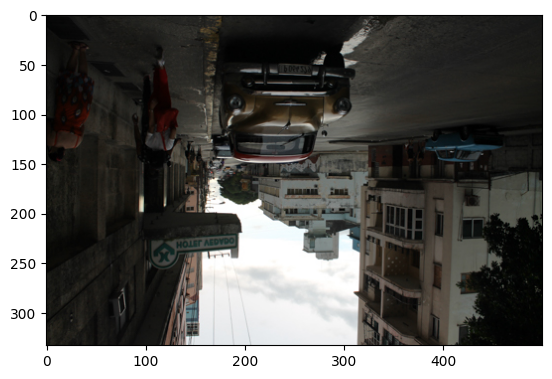

In [5]:
import skimage as ski
import os
from natsort import natsorted, ns
import numpy as np
import matplotlib.pyplot as plt

bild01 = ski.io.imread(os.path.join("bild01.jpg"))

print("Shape of bild01:", bild01.shape)
print("Data type of bild01:", bild01.dtype)

plt.imshow(bild01)

def show_Image(img):
    red = img[:, :, 0]   # alle Zeilen und SPalten mit dem Rot-Kanal ausgwählt
    green = img[:, :, 1]
    blue = img[:, :, 2]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)   # 1 Zeile, 3 Spalten, 1 Index der aktuellen Teilgrafik
    plt.imshow(red, cmap='Reds')
    plt.title("Red Channel")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(green, cmap='Greens')
    plt.title("Green Channel")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(blue, cmap='Blues')
    plt.title("Blue Channel")
    plt.axis('off')

    return plt.show()

def mirror_Image(img, orientation):

    mirrored = []

    if orientation == "horizontal":
        for row in img:
            new_row = []
            for i in range(len(row)-1, -1, -1):
                new_row.append(row[i])
            mirrored.append(new_row)

    elif orientation == "vertical":
        for i in range(len(img)-1, -1, -1):
            mirrored.append(img[i])

    else:
        raise ValueError("Ungültige Ausrichtung. Wählen Sie 'horizontal' oder 'vertical'.")
        
    return mirrored

show_Image(bild01)
mirror_Imagered = mirror_Image(bild01, "vertical")
plt.imshow(mirror_Imagered)


Aufgabenteil 2

 Laden Sie das Buch Digitale Bildverarbeitung aus Moodle herunter. Lesen Sie die
 Kapitel 4- 5 (Histogramme und Punktoperationen).
 2. Lesen Sie die Bilder mit Hilfe von scikit-image ein.
 3. Schreiben Sie einen Funktion, die das Histogramm eines 8-Bit-Graustufenbildes (256
 Intensitatsstufen) berechnet.
 • Zunchst muss eine Funktion geschrieben werden, die ein RGB-Bild in ein Graustufen
bild (mit nur einem Kanal) umwandelt.
 • Prototyp: histo = computeHisto(image) # histo as numpy array of size 256
 • Das Histogramm kann mithilfe der Bibliothek matplotlib angezeigt werden. Das
 Anzeigen eines Histogramms (in Form eines 1-dimensionalen Numpy Arrays) ist in
 template.py bereits implementiert

Bilder einlesen

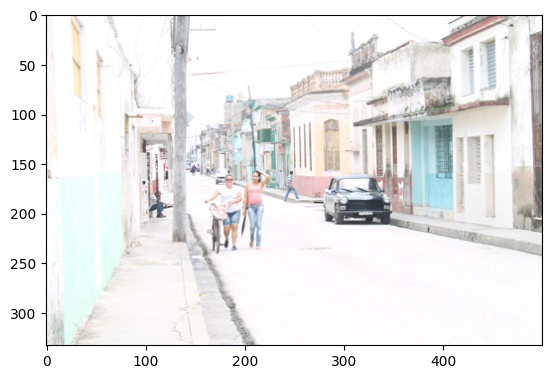

In [17]:

list_files = os.listdir('.')
list_files = ['bild01.jpg', 'bild02.jpg', 'bild03.jpg', 'bild04.jpg', 'bild05.jpg', 'monkey.jpg', 'sea_wall.jpg', 'wood.jpg']
image_list = []
for file in list_files:
    image = ski.io.imread(file)
    image_list.append(image)
plt.imshow(image_list[2])
plt.show()